<a href="https://colab.research.google.com/github/CoderArshia/Project-113/blob/main/project_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded=files.upload()


In [ ]:
import pandas as pd
import statistics
import plotly.express as px
df=pd.read_csv("savings_data_final.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()


In [ ]:
import csv
with open ("savings_data_final.csv",newline='') as f:
  reader=csv.reader(f)
  savings_data=list(reader)

savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_reminder=0

for data in savings_data:
  if int (data[3])==1:
    total_people_given_reminder=total_people_given_reminder+1

import plotly.graph_objects as go 
fig=go.Figure(go.Bar(x=["Reminded","Not Reminded"],y=[total_people_given_reminder,(total_entries-total_people_given_reminder)]))
fig.show()



In [ ]:
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"mean of savings - {statistics.mean(all_savings)}")
print(f"median of savings - {statistics.median(all_savings)}")
print(f"mode of savings - {statistics.mode(all_savings)}")

mean of savings - 85.32780331328739
median of savings - 39.2724
mode of savings - 0.0


In [ ]:
reminded_savings=[]
not_reminded_savings=[]

for data in savings_data:
  if int (data[3])==1:
    reminded_savings.append(float(data[0]))
  else: 
    not_reminded_savings.append(float(data[0]))

print("result for people who were reminded to save")
print(f"mean of savings - {statistics.mean(reminded_savings)}")
print(f"median of savings - {statistics.median(reminded_savings)}")
print(f"mode of savings - {statistics.mode(reminded_savings)}")

print("result for people who were not reminded to save")
print(f"mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"median of savings - {statistics.median(not_reminded_savings)}")
print(f"mode of savings - {statistics.mode(not_reminded_savings)}")







result for people who were reminded to save
mean of savings - 82.56940908263547
median of savings - 39.2724
mode of savings - 0.0
result for people who were not reminded to save
mean of savings - 89.67095185226523
median of savings - 36.0475
mode of savings - 0.0


In [ ]:
print(f"standard deviation of all savings - {statistics.stdev(all_savings)}")
print(f"standard deviation of people who were reminded - {statistics.stdev(reminded_savings)}")
print(f"standard deviation of people who were not reminded - {statistics.stdev(not_reminded_savings)}")

standard deviation of all savings - 196.75453011909315
standard deviation of people who were reminded - 173.24866414440817
standard deviation of people who were not reminded - 228.875050299707


In [ ]:
import numpy as np
age=[]
savings=[]

for data in savings_data:
  if float (data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation=np.corrcoef(age,savings)
print(f"correlation between the age of the person and their savings is -{correlation[0,1]*100}")


correlation between the age of the person and their savings is -3.663447975985462


In [ ]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df["quant_saved"].tolist()],["Savings"],show_hist=True)
fig.show()

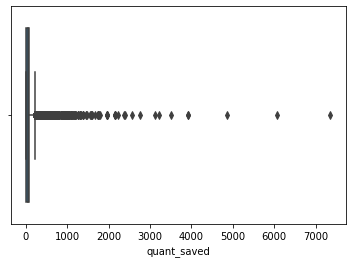

In [ ]:
#c113
import seaborn as sns 
sns.boxplot(data=df,x=df["quant_saved"])

In [ ]:
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)
iqr=q3-q1

print(f"Q1-{q1}")
print(f"Q3-{q3}")
print(f"IQR-{iqr}")

lowder_value=q1-1.5*iqr
upper_value=q3+1.5*iqr
print(f"lower value-{lowder_value}")
print(f"upper value-{upper_value}")

new_df=df[df["quant_saved"]<upper_value]

Q1-2.2840000000000003
Q3-86.514
IQR-84.22999999999999
lower value--124.06099999999998
upper value-212.85899999999998


In [ ]:
all_savings=new_df["quant_saved"].tolist()

print(f"mean of savings - {statistics.mean(all_savings)}")
print(f"median of savings - {statistics.median(all_savings)}")
print(f"mode of savings - {statistics.mode(all_savings)}")
print(f"standad deviation of savings - {statistics.stdev(all_savings)}")

fig=ff.create_distplot([new_df["quant_saved"].tolist()],["Savings"],show_hist=False)
fig.show()

mean of savings - 46.200519389818794
median of savings - 36.0475
mode of savings - 0.0
standad deviation of savings - 50.866871917288634


In [ ]:
import random 
sampling_mean_list=[]
for i in range (1000):
  temp_list=[]
  for j in range (100):
    temp_list.append(random.choice(all_savings))

  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling=statistics.mean(sampling_mean_list)

fig=ff.create_distplot([sampling_mean_list],["Savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="MEAN"))
fig.show()


In [ ]:
print(f"standard deviation of the sampling data -{statistics.stdev(sampling_mean_list)}")

standard deviation of the sampling data -5.1874685669015745


In [ ]:
print(f"mean of population -{statistics.mean(all_savings)}")
print(f"mean of sampling distribution -{mean_sampling}")

mean of population -46.200519389818794
mean of sampling distribution -46.32153088784895


In [ ]:
import numpy as np
temp_df=new_df[new_df.age!=0]
age=temp_df["age"].tolist()
savings=temp_df["quant_saved"].tolist()

correlation=np.corrcoef(age,savings)
print(f"correlation between the age of the person and their savings is -{correlation[0,1]}")


correlation between the age of the person and their savings is -0.08561544120342093


In [ ]:
reminded_df=new_df.loc[new_df["rem_any"]==1]
not_reminded_df=new_df.loc[new_df["rem_any"]==0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [ ]:
fig=ff.create_distplot([not_reminded_df["quant_saved"].tolist()],["Savings"],show_hist=False)
fig.show()




In [ ]:
import random 
not_reminded_savings=not_reminded_df["quant_saved"].tolist()
sampling_mean_list_not_reminded=[]
for i in range (1000):
  temp_list=[]
  for j in range (100):
    temp_list.append(random.choice(not_reminded_savings))

  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)

stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)
print(f"standard deviation of the sampling data -{stdev_sampling_not_reminded}")
print(f"mean of the sampling data -{mean_sampling_not_reminded}")

fig=ff.create_distplot([sampling_mean_list],["Savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="MEAN"))
fig.show()


standard deviation of the sampling data -5.098089935172543
mean of the sampling data -44.09368802117816


In [ ]:
first_sd_start=mean_sampling_not_reminded-stdev_sampling_not_reminded
first_sd_end=mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"first(start)-{first_sd_start}and first(end)-{first_sd_end}")

second_sd_start=mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_sd_end=mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"second(start)-{second_sd_start}and second(end)-{second_sd_end}")

third_sd_start=mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
first_sd_end=mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"first(start)-{first_sd_start}and first(end)-{first_sd_end}")



first(start)-38.995598086005614and first(end)-49.191777956350705
second(start)-33.897508150833076and second(end)-54.289867891523244
first(start)-38.995598086005614and first(end)-59.38795782669579


In [ ]:
import random 
reminded_savings=reminded_df["quant_saved"].tolist()
sampling_mean_list_reminded=[]
for i in range (1000):
  temp_list=[]
  for j in range (100):
    temp_list.append(random.choice(reminded_savings))

  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded=statistics.mean(sampling_mean_list_reminded)

stdev_sampling_reminded=statistics.stdev(sampling_mean_list_reminded)
print(f"standard deviation of the sampling data -{stdev_sampling_reminded}")
print(f"mean of the sampling data -{mean_sampling_reminded}")

fig=ff.create_distplot([sampling_mean_list_reminded],["Savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="MEAN"))
fig.show()


standard deviation of the sampling data -5.025322743199442
mean of the sampling data -47.71822346257797


In [ ]:
z_score=(mean_sampling_reminded-mean_sampling_not_reminded)/stdev_sampling_not_reminded
print(f"z_score-{z_score}")

z_score-0.7109594941418264
